In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from datetime import datetime
#%matplotlib
import gps_to_utm29n as gtu

 ### This h5 file containing the boy database 
 - *pd.HDFStore(mkivh5_file)* Converts the h5 file into pandas Dataframe
 - *gps_locations* is the h5 table that contains the lat and longs for mkiv.
 - *lat_lon* holds the lat and lon values of the rader

In [2]:
mkivh5_file = r"mkiv.h5" 
h5 = pd.HDFStore(mkivh5_file)
mkiv_gps_df = h5.select('/gps_locations')

In [3]:
lat_lon = {
    'lat' : 58.5152405,
    'lon' : -6.2604932
}

In [4]:
help(gtu.convertCoords)

Help on function convertCoords in module gps_to_utm29n:

convertCoords(dictionary)
    This Converts lat and long values into a UTM 29 North values



In [5]:
UTM29N = gtu.convertCoords(lat_lon)

In [6]:
help(gtu.utm_of_the_polar_data)

Help on function utm_of_the_polar_data in module gps_to_utm29n:

utm_of_the_polar_data(UTM29N, distance, columns, rows)
    This takes the UTM29N values of the radar, the distance the radar covers, 
    and the quantity of rows and columns for the whole rotation. 
    
    This returns a dictionary that holds the UTM29N values for the whole rotation, 
    and a Scatter Plot that shows the rotations and its UTM 29 North 
    values.



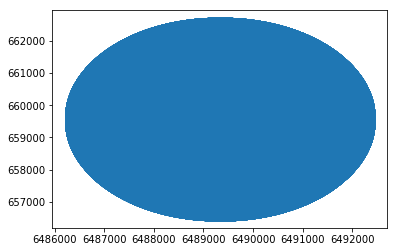

In [9]:
xopp_and_yadj = gtu.utm_of_the_polar_data(UTM29N, 3070, 4096, 1024)

In [10]:
help(gtu.mk_utm29n_values)

Help on function mk_utm29n_values in module gps_to_utm29n:

mk_utm29n_values(angular_position_range, distance_position_range, xopp_and_yadj)
    This takes a dictionary that contains the whole rotational utm29n values 
    and extracts the utm29n values of the mkiv using the angular,
    and distance position range of the mkiv
    
    This returns a dic with the mkiv or mkiii's UTM29N x and y positions in the 
    radar and shows the scatter plot



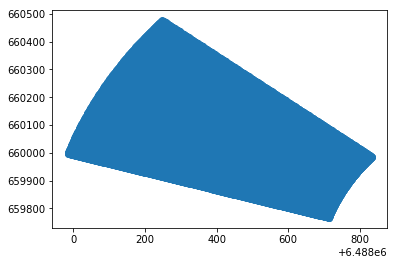

In [13]:
angular_position_range = list(range(3272,3528))
distance_position_range = list(range(216,472))

mkiv_xopp_and_yadj_utm29n = gtu.mk_utm29n_values(angular_position_range, distance_position_range, xopp_and_yadj)

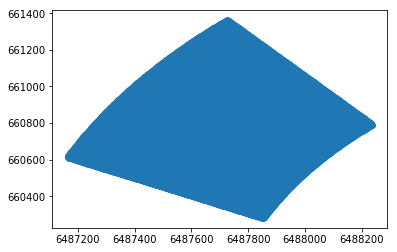

In [14]:
angular_range_mkiii = list(range(3365,3621)) 
distance_cells_range_mkiii = list(range(547,803))

mkiii_xopp_and_yadj_utm29n = gtu.mk_utm29n_values(angular_range_mkiii, distance_cells_range_mkiii, xopp_and_yadj)

In [15]:
%matplotlib
xopp_and_yadj = gtu.utm_of_the_polar_data(UTM29N, 3070, 4096, 1024)

Using matplotlib backend: Qt5Agg


In [16]:
mkiv_xopp_and_yadj_utm29n = gtu.mk_utm29n_values(angular_position_range, distance_position_range, xopp_and_yadj)

In [17]:
mkiii_xopp_and_yadj_utm29n = gtu.mk_utm29n_values(angular_range_mkiii, distance_cells_range_mkiii, xopp_and_yadj)